In [1]:
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
connection = psycopg2.connect(
    user = "*****",
    password = "*****",
    host = "localhost",
    port = "5432",
    database = "postgres"
)

In [3]:
cursor = connection.cursor()
sql1 = ("select * from hasta_bilgi")
cursor.execute(sql1)
result1 = cursor.fetchall()
column_names1 = ["hasta_id","age","sex"]
df1 = pd.DataFrame(result1, columns = column_names1 )
df1.head()


,hasta_id,age,sex
0,1,63,1
1,2,37,1
2,3,41,0
3,4,56,1
4,5,57,0


In [4]:
sql2 = ("select * from kalp")
cursor.execute(sql2)
result2 = cursor.fetchall()
column_names2 = ["bilgi_id","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope",
                 "ca","thal","target","hasta_id"]
df2= pd.DataFrame(result2, columns = column_names2 )
df2.head()

,bilgi_id,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hasta_id
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,2,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,3,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,4,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,5,0,120,354,0,1,163,1,0.6,2,0,2,1,5


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hasta_id  303 non-null    int64
 1   age       303 non-null    int64
 2   sex       303 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bilgi_id  303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
 13  hasta_id  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df1.describe()

,hasta_id,age,sex
count,303.000000,303.000000,303.000000
mean,152.000000,54.366337,0.683168
std,87.612784,9.082101,0.466011
min,1.000000,29.000000,0.000000
25%,76.500000,47.500000,0.000000
50%,152.000000,55.000000,1.000000
75%,227.500000,61.000000,1.000000
max,303.000000,77.000000,1.000000


In [8]:
data_name = column_names2
data_name.pop(0)
data_name.pop()
data_name.pop()
scale_data = pd.DataFrame(df2.iloc[:, 1:12], columns = data_name)
target_data = pd.DataFrame(df2.iloc[:, 12], columns = ["target"])
scale_data.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3,145,233,1,0,150,0,2.3,0,0,1
1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,130,204,0,0,172,0,1.4,2,0,2
3,1,120,236,0,1,178,0,0.8,2,0,2
4,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
data_name2 = column_names1
data_name2.pop(0)
data2 = pd.DataFrame(df1.iloc[:, 1:],
                     columns = data_name2)
data2.head()

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [10]:
allData = pd.concat([data2,scale_data], axis=1)
allData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(allData))

StandardScaler()


In [12]:
DataScaled = scaler.fit_transform(allData)
DataScaled = pd.DataFrame(DataScaled, columns = list(allData.columns))


In [13]:
summary = DataScaled.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


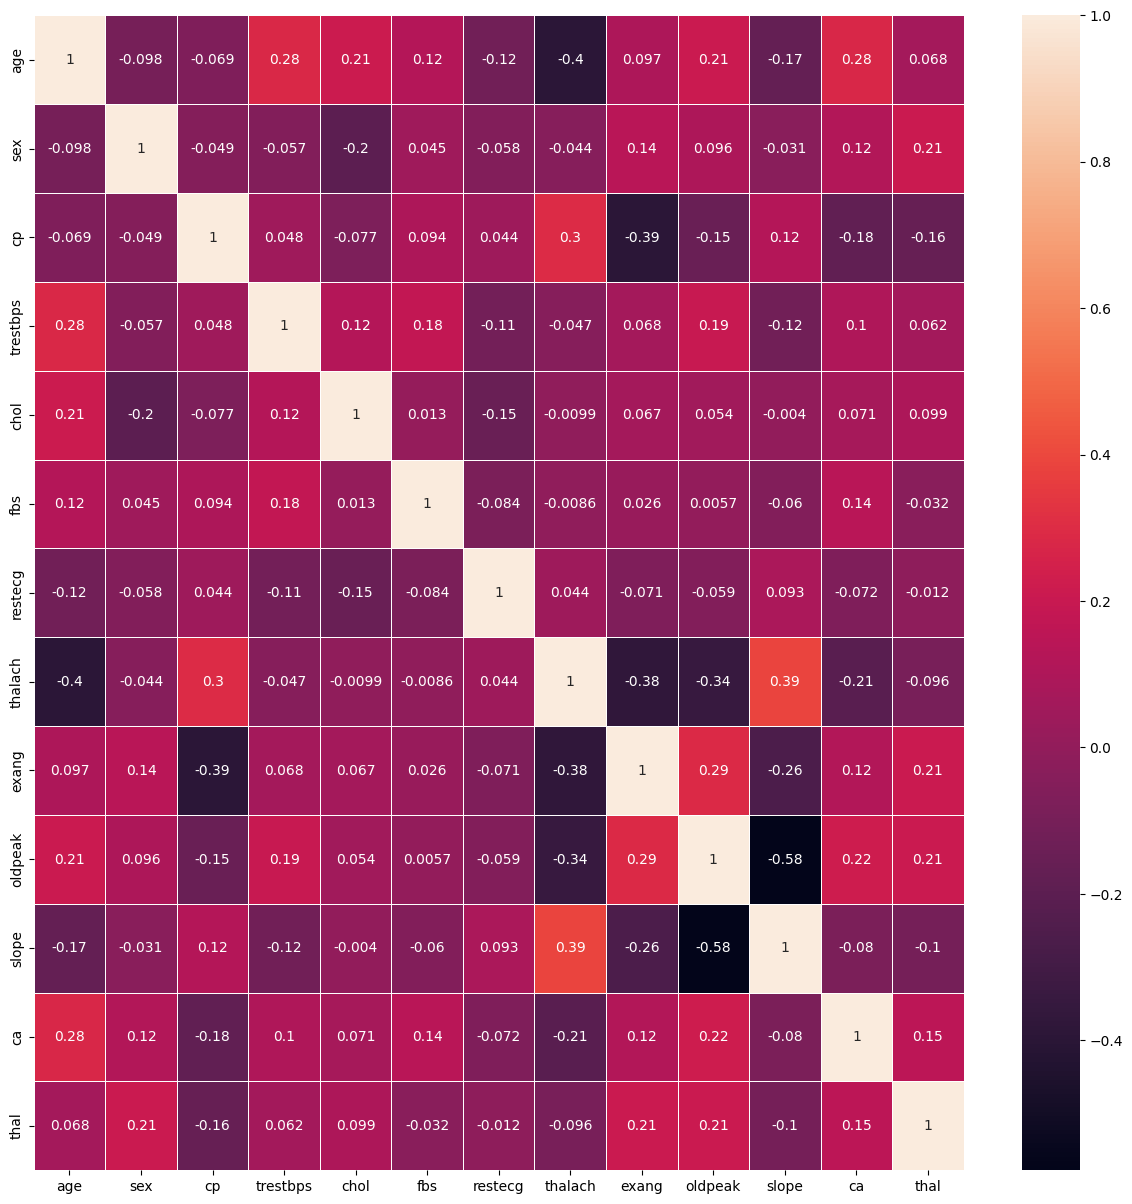

In [15]:
correlationMatrix = DataScaled.corr()
figure, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlationMatrix, annot = True, linewidths = .5, ax=ax)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DataScaled,target_data,test_size = 0.30, random_state = 42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)  
classifier.fit(X_train,np.ravel(y_train))

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

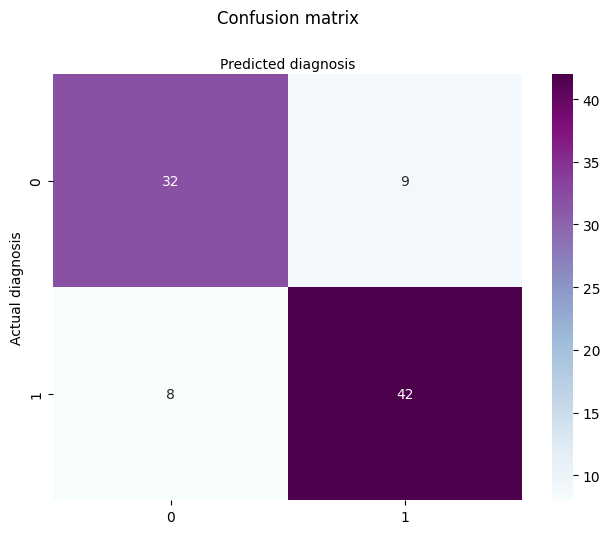

In [19]:
from sklearn import metrics
def conf_matrix(y_test, y_pred):
    matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Visualizing the Confusion Matrix
    class_names = [0,1] # Our diagnosis categories
    
    fig, ax = plt.subplots()
    # Setting up and visualizing the plot (do not worry about the code below!)
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="BuPu" ,fmt='g') # Creating heatmap
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual diagnosis')
    plt.xlabel('Predicted diagnosis')

conf_matrix(y_test, y_pred)

In [20]:
def stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

stats(y_test, y_pred)

Accuracy:  0.8131868131868132
Precision:  0.8235294117647058
Recall:  0.84


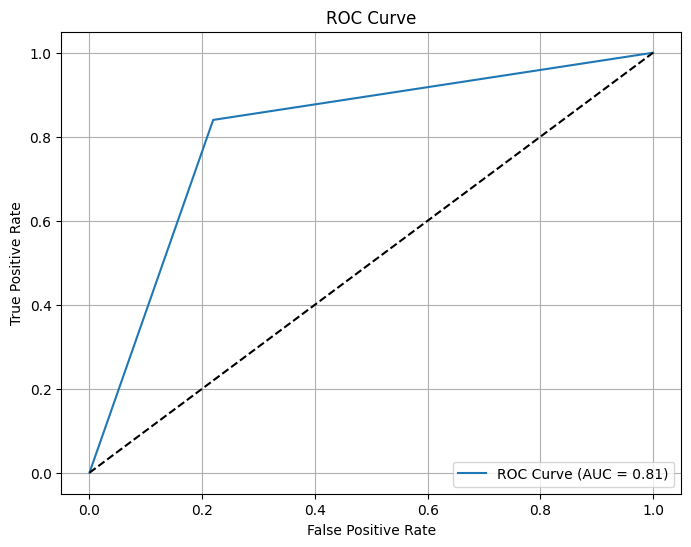

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi için fpr, tpr ve eşik değerlerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC skorunu hesapla
auc_score = roc_auc_score(y_test, y_pred)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # rasgele tahminin ROC eğrisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 

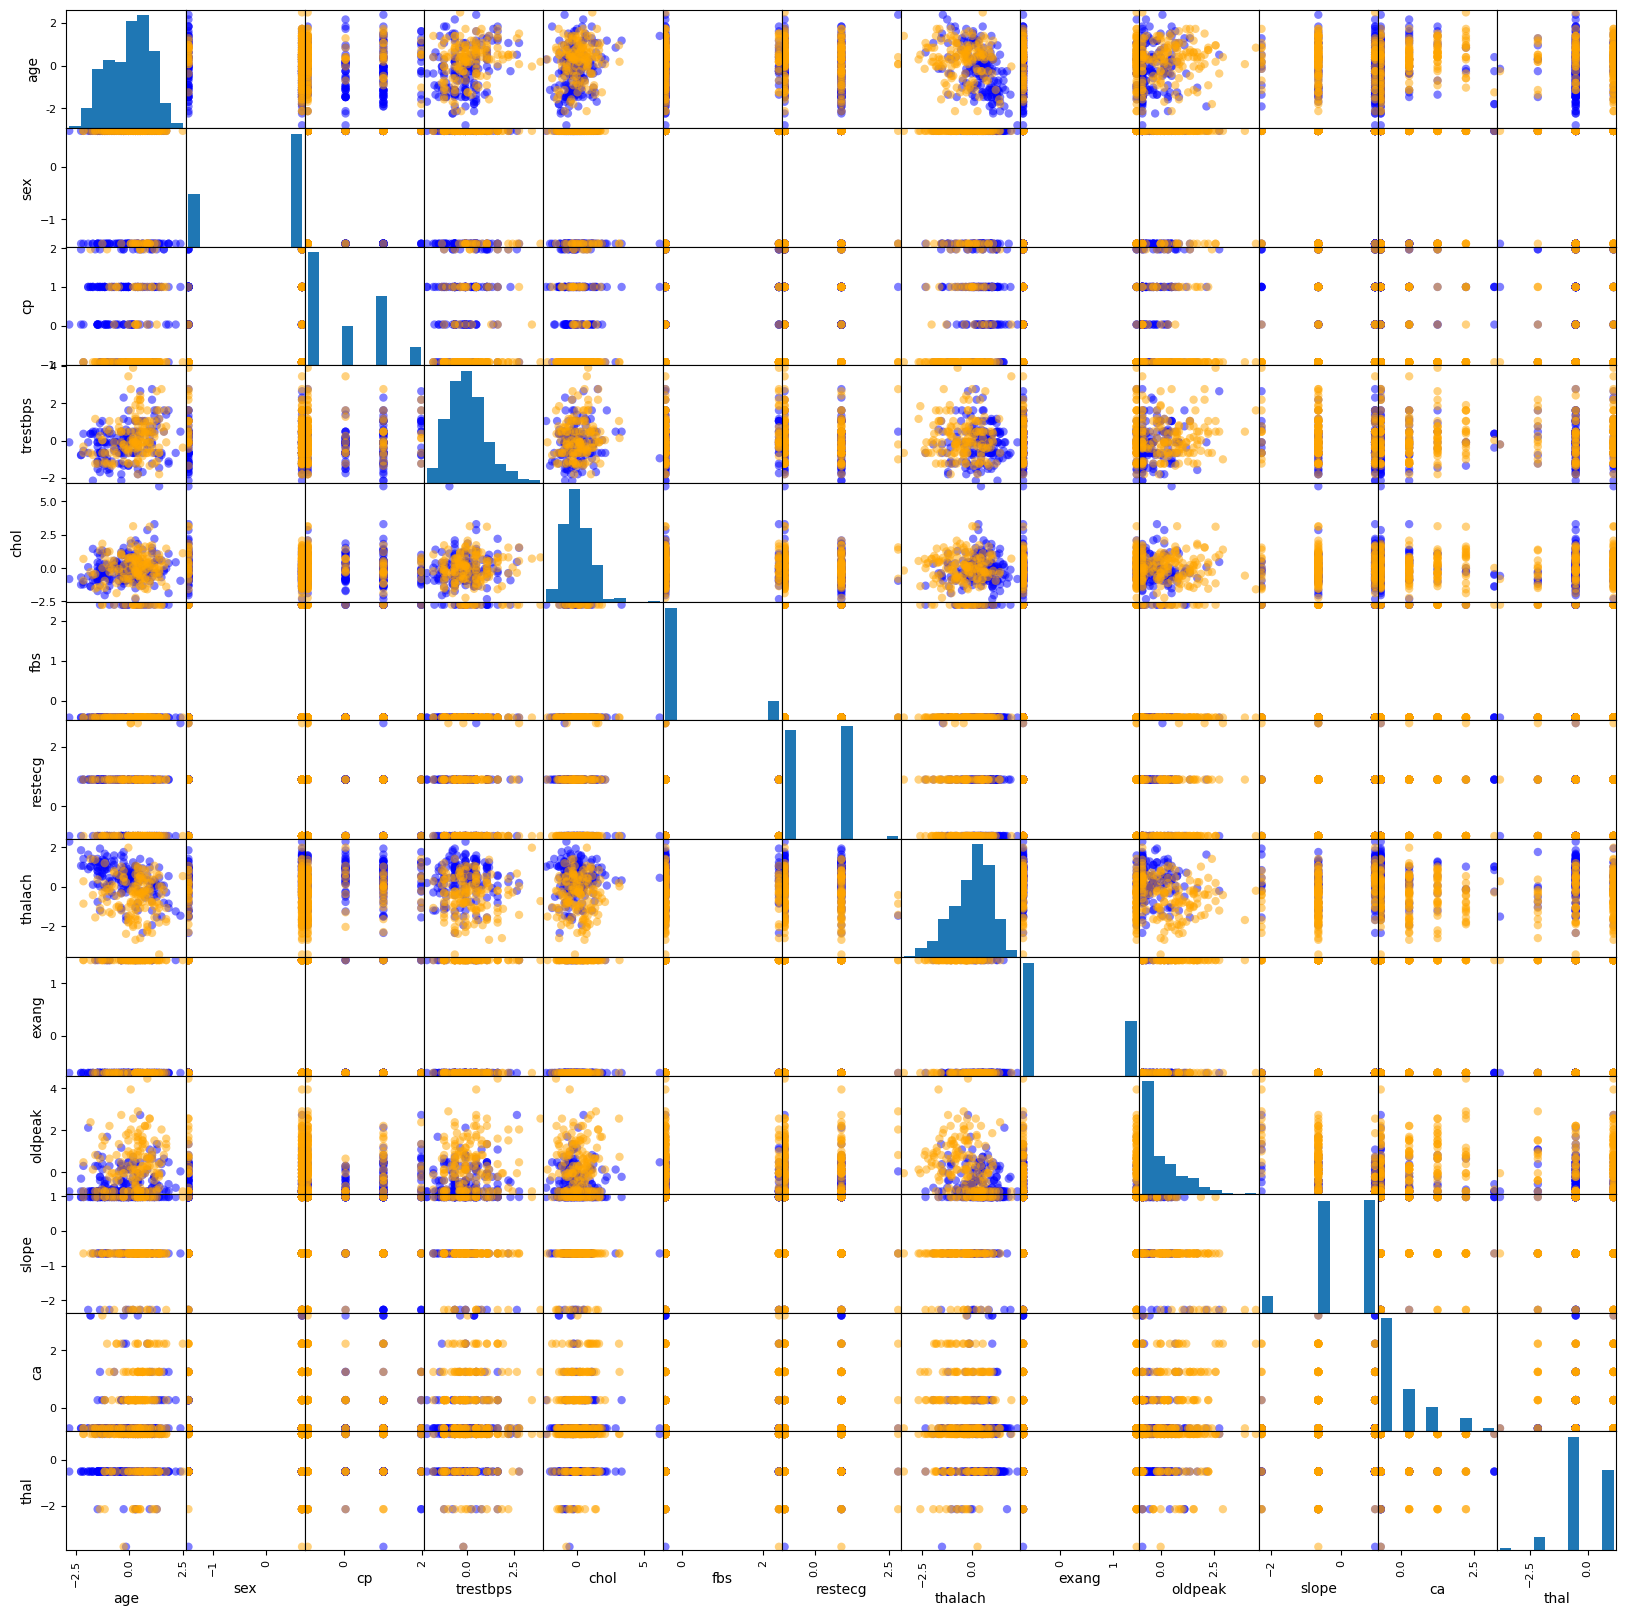

In [22]:
pred_colors = {0:'orange', 1:'blue'}
pd.plotting.scatter_matrix(DataScaled,figsize=(20,20),grid=True,
                           marker='o', c= target_data['target'].map(pred_colors))
plt.show()
 

Accuracy:  0.8241758241758241
Precision:  0.84
Recall:  0.84


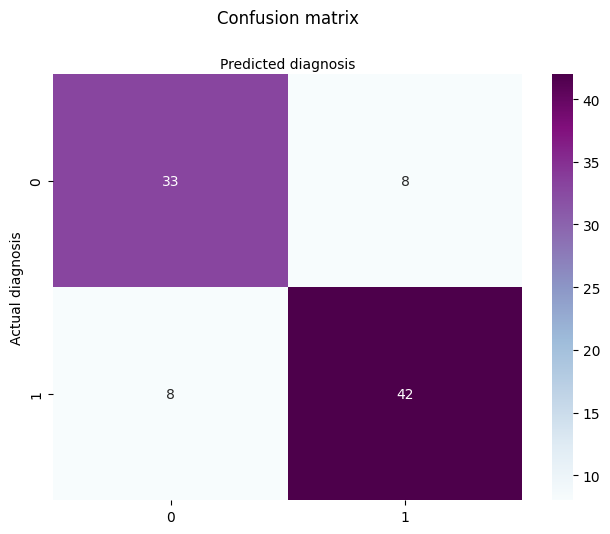

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier_2 = KNeighborsClassifier(n_neighbors = 13)
classifier_2.fit(X_train,np.ravel(y_train))
pred_2 = classifier_2.predict(X_test)
conf_matrix(y_test, pred_2)
stats(y_test, pred_2)

Accuracy: 0.79121
Estimator: 10
Accuracy: 0.81319
Estimator: 12
Accuracy: 0.81319
Estimator: 14
Accuracy: 0.83516
Estimator: 16
Accuracy: 0.82418
Estimator: 18
Accuracy: 0.82418
Estimator: 20
Accuracy: 0.83516
Estimator: 22
Accuracy: 0.82418
Estimator: 24
Accuracy: 0.82418
Estimator: 26
Accuracy: 0.82418
Estimator: 28
Accuracy: 0.82418
Estimator: 30
Accuracy: 0.82418
Estimator: 32
Accuracy: 0.81319
Estimator: 34
Accuracy: 0.82418
Estimator: 36
Accuracy: 0.82418
Estimator: 38
Accuracy: 0.82418
Estimator: 40
Accuracy: 0.82418
Estimator: 42
Accuracy: 0.81319
Estimator: 44
Accuracy: 0.81319
Estimator: 46
Accuracy: 0.80220
Estimator: 48
Accuracy: 0.80220
Estimator: 50
Accuracy: 0.81319
Estimator: 52
Accuracy: 0.80220
Estimator: 54
Accuracy: 0.80220
Estimator: 56
Accuracy: 0.80220
Estimator: 58
Accuracy: 0.80220
Estimator: 60
Accuracy: 0.80220
Estimator: 62
Accuracy: 0.81319
Estimator: 64
Accuracy: 0.81319
Estimator: 66
Accuracy: 0.81319
Estimator: 68
Accuracy: 0.82418
Estimator: 70
Accuracy

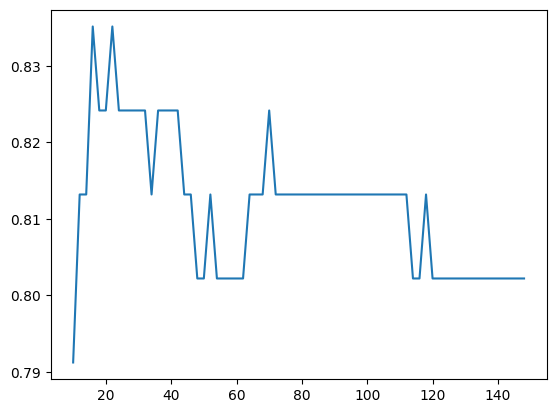

In [24]:
from sklearn.ensemble import RandomForestClassifier
#hangi n_estimator sayısında en çok accuracy alıyorsa onu seçtirt

x = np.arange(10,150,2)
a = []
for i in x:
    rf = RandomForestClassifier(n_estimators = i, random_state =0)
    rf.fit(X_train,np.ravel(y_train))
    y_pred3 = rf.predict(X_test)
    print('Accuracy: {0:0.5f}\nEstimator: {1}'. format(metrics.accuracy_score(y_test, y_pred3), i))
    a.append(metrics.accuracy_score(y_test, y_pred3))
plt.plot(x,a)

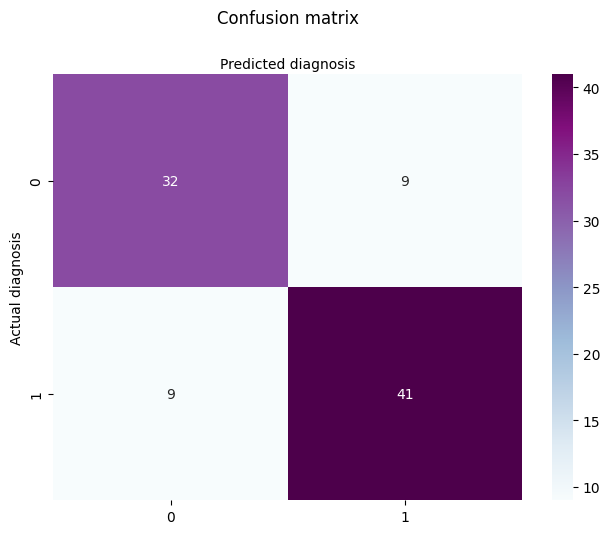

In [25]:
conf_matrix(y_test, y_pred3)

In [26]:
feature_score = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

ca          0.151211
thalach     0.112219
cp          0.109469
thal        0.106642
oldpeak     0.104849
age         0.081485
chol        0.075625
exang       0.074360
trestbps    0.073508
slope       0.048490
sex         0.031384
restecg     0.019885
fbs         0.010873
dtype: float64

In [27]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
X_train_t = torch.from_numpy(X_train.values).type(torch.float)
X_test_t = torch.from_numpy(X_test.values).type(torch.float)
y_train_t = torch.from_numpy(y_train.values).type(torch.float)
y_test_t = torch.from_numpy(y_test.values).type(torch.float)
X_train_t.shape, X_train.shape

(torch.Size([212, 13]), (212, 13))

In [33]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc


torch.manual_seed(42)

n = np.arange(10,25,1)
m = np.arange(10,25,1)
accr = np.zeros((15,15))
w= []
for i in n:
    for j in m:
        class Model0(nn.Module):
            def __init__(self):
                super(Model0, self).__init__()
                self.layer_1 = nn.Linear(in_features=13, out_features=i)
                self.layer_2 = nn.Linear(in_features=i, out_features=j)
                self.layer_3 = nn.Linear(in_features=j, out_features=15)
                self.layer_4 = nn.Linear(in_features=15, out_features=1)
                self.relu = nn.ReLU()
                self.sigmoid = nn.Sigmoid()
            
            def forward(self, x):
                x = self.relu(self.layer_1(x))
                x = self.relu(self.layer_2(x))
                x = self.relu(self.layer_3(x))
                x = self.sigmoid(self.layer_4(x))
                return x
        model_0 = Model0().to(device)
        loss_f = nn.BCELoss()
        optimizer = torch.optim.Adam(model_0.parameters(), lr=0.1)       
        
        epochs = 1000
        
        X_train_t, y_train_t = X_train_t.to(device), y_train_t.to(device)
        X_test_t, y_test_t = X_test_t.to(device), y_test_t.to(device)
        
        for epoch in range(epochs):
            model_0.train()
            X_train_sq = model_0(X_train_t)
            y_pred = torch.round(torch.sigmoid(X_train_sq))
        
            loss = loss_f(X_train_sq,
                          y_train_t)
            acc =  accuracy_fn(y_true=y_train_t, 
                              y_pred=y_pred) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            model_0.eval()
            with torch.no_grad():
                # 1. Forward pass
                X_test_sq = model_0(X_test_t)
                X_test_sq_pred = torch.round(torch.sigmoid(X_test_sq))
                # 2. Caculate loss/accuracy
                test_loss = loss_f(X_test_sq,
                                    y_test_t)
                test_acc = accuracy_fn(y_true=y_test_t,
                                       y_pred=X_test_sq_pred)
                w.append(test_acc)
            """if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")"""
        accr[i-10,j-10] = max(w)
        w.clear()
        print(j)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [34]:
X_train_sq = model_0(X_train_t).squeeze()
X_train_sq.shape

torch.Size([212])

In [51]:
X_train_t.dtype

torch.float32

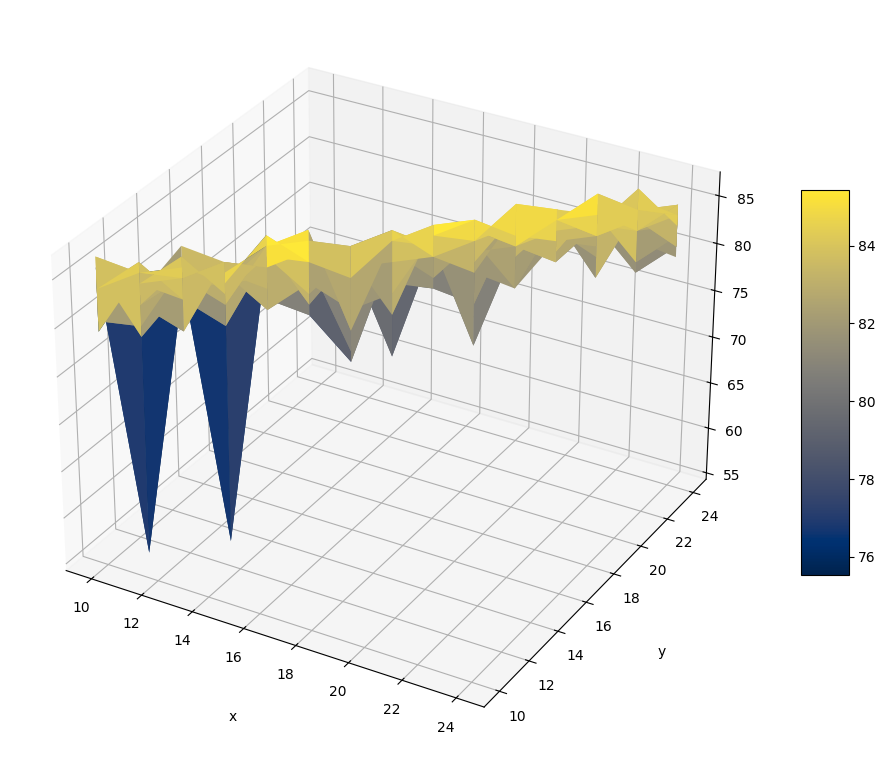

In [62]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(n, m, accr, cmap = plt.cm.cividis)
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

In [57]:
max_index = np.argmax(accr)
a,b = np.unravel_index(max_index, accr.shape)
max_Acc = np.max(accr)
a+10,b+10, max_Acc

(10, 12, 86.81318681318682)